<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/Purchase_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# step - 1 (Importing labraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# step -2 ( Data loading )
data = pd.read_csv("purchase_data.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [ ]:
# How to print the full data
# print(data.to_string())

In [ ]:
# step -3 ( EDA Exploratory Data Analysis )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [ ]:
# We are going to fix "Stay_In_Current_City_Years"

In [ ]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [ ]:
# We are going to replace 4+ with 4 so we can change the data type to int
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].replace("4+" , 4)

In [ ]:
data["Stay_In_Current_City_Years"].unique()

array(['2', 4, '3', '1', '0', nan], dtype=object)

In [ ]:
# Change the data type of column back to int because 4+ is alsready removed
#data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].astype(int)

# First remove missing values

In [ ]:
# Fill the missing values
data.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,81514


In [ ]:
data.isna().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,81514


In [ ]:
# Fill 0 in place of missing values in Product category 2 and 3 column
data["Product_Category_2"].fillna(0 , inplace=True)
data["Product_Category_3"].fillna(0 , inplace=True)

<ipython-input-74-399be691b1d2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Product_Category_2"].fillna(0 , inplace=True)
<ipython-input-74-399be691b1d2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
data.isna().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,0


In [ ]:
data.isna().sum().sum()  # Total null values left in our data

9

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(263014, 12)

In [ ]:
# Check for duplicate record
data.duplicated().sum()

0

In [ ]:
# Change the data type of column back to int because 4+ is alsready removed
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  int64  
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 26.1+ MB


In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4,0.0,8.0,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263009,1004473,P00296542,M,36-45,1.0,B,3,0.0,8.0,0.0,0.0,8061.0
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,0.0,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,0.0,3608.0


# Encoding technique

To convert categorical column to numerical column

We are going to use LabelEncoding

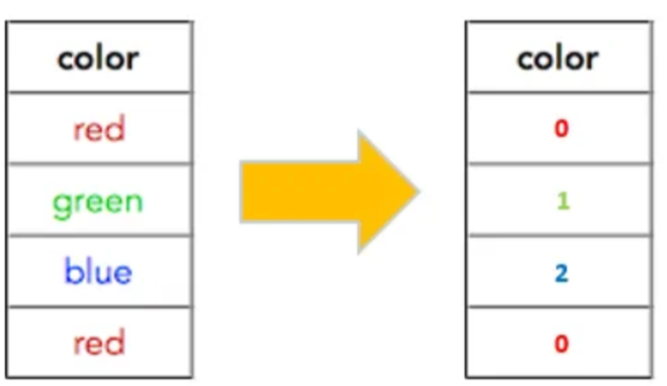

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
data["Product_ID"]=le.fit_transform(data["Product_ID"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Age"] = le.fit_transform(data["Age"])
data["City_Category"] = le.fit_transform(data["City_Category"])

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,647,0,0,10.0,0,2,0.0,3.0,0.0,0.0,8370.0
1,1000001,2304,0,0,10.0,0,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,814,0,0,10.0,0,2,0.0,12.0,0.0,0.0,1422.0
3,1000001,790,0,0,10.0,0,2,0.0,12.0,14.0,0.0,1057.0
4,1000002,2657,1,6,16.0,2,4,0.0,8.0,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263009,1004473,2762,1,3,1.0,1,3,0.0,8.0,0.0,0.0,8061.0
263010,1004473,403,1,3,1.0,1,3,0.0,5.0,18.0,0.0,3722.0
263011,1004473,1015,1,3,1.0,1,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,1717,1,3,1.0,1,3,0.0,5.0,7.0,0.0,3608.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  int64  
 2   Gender                      263014 non-null  int64  
 3   Age                         263014 non-null  int64  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  int64  
 6   Stay_In_Current_City_Years  263014 non-null  int64  
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 26.1 MB


# Statistic Analysis

1) Preparing a sample

2) Creating a hypothesis ( Null hypothesis , Alternate hypothesis )

3) Applying the appropriate test ( based on requirement or case )

4) Compare the p_value


# a) It was observed that the average purchase made by man of the age 18-25 was 10,000 rupees . Is it still the same ?

In [ ]:
# Extract the data of man and age group 18-25

new_data = data[(data["Age"]==1) & (data["Gender"]==1)]
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
97,1000021,2024,1,1,16.0,1,0,0.0,3.0,12.0,0.0,3055.0
98,1000022,3261,1,1,15.0,0,4,0.0,1.0,8.0,17.0,12099.0
99,1000022,1954,1,1,15.0,0,4,0.0,5.0,8.0,0.0,8797.0
100,1000022,1792,1,1,15.0,0,4,0.0,3.0,4.0,0.0,10681.0
101,1000022,1020,1,1,15.0,0,4,0.0,8.0,14.0,0.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262767,1004446,1311,1,1,18.0,1,1,1.0,1.0,2.0,0.0,15431.0
262951,1004465,2880,1,1,4.0,0,1,1.0,5.0,0.0,0.0,1763.0
262952,1004465,1296,1,1,4.0,0,1,1.0,2.0,3.0,4.0,3240.0
262953,1004465,2733,1,1,4.0,0,1,1.0,8.0,0.0,0.0,5832.0


In [ ]:
# Collect a sample from population
sample = new_data.sample(3600, random_state =5 )
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
139338,1003536,1301,1,1,4.0,2,0,0.0,1.0,15.0,16.0,11545.0
207997,1002023,1734,1,1,4.0,1,2,1.0,3.0,4.0,5.0,13317.0
93718,1002446,982,1,1,7.0,1,0,0.0,8.0,0.0,0.0,7891.0
59016,1003112,2192,1,1,12.0,0,3,0.0,1.0,15.0,16.0,15666.0
2745,1000438,2953,1,1,11.0,0,3,0.0,2.0,0.0,0.0,13129.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202064,1001186,3054,1,1,19.0,0,1,1.0,5.0,0.0,0.0,5471.0
219749,1003871,995,1,1,4.0,2,4,0.0,1.0,5.0,12.0,15535.0
149953,1005137,210,1,1,18.0,2,4,0.0,5.0,0.0,0.0,8828.0
230610,1005565,690,1,1,17.0,2,2,0.0,1.0,15.0,17.0,19338.0


Null hypothesis = Mean will be equal to 10,000

Alternate hypothesis = Mean will not be equal to 10,000

In [ ]:
#new_data["Purchase"].mean()  # Average purchase of population

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
a_mean = 10000 # Population mean

In [ ]:
t_stat , p_value = ttest_1samp(sample["Purchase"], a_mean)
print(t_stat , p_value)
# 1.7977812377777705e-10

-6.396199324261645 1.7977812377777705e-10


In [ ]:
value =1.7977812377777705e-10
print(f"{value: .25f}")

 0.0000000001797781237777771


In [ ]:
# If p value is > 0.05 = Fail to rejet the Null hypothessi ( Accept Null hypothesis )
# If p value is < 0.05 = Accept the alternate hypothesis

In [ ]:
value = 0.0000000001797781237777771
if value >0.05:
  print("Fail to rejet the Null hypothessi ( Accept Null hypothesis )")
else:
  print("Accept the alternate hypothesis ( Mean is not be equal to 10,000 )")

Accept the alternate hypothesis ( Mean is not be equal to 10,000 )


b) **Is the percentage of men who spent more than 10,000 the same for age 18-25 and 26-35 ?**

c) **Is the average purchase made by men and women of age 18-25 are same or not ?**

d) **It ws observed that the percanatge of women that spend more than 10,000 was 35% is it still the same?**